# Debate dos Presidenciáveis na SBT - 2018

O debate ocorreu das 17h45 até 19h20 do dia 26 de Setembro de 2018 com a presença dos seguintes presidenciáveis:
- Alvaro Dias (Podemos)
- Cabo Daciolo (Patriota)
- Ciro Gomes (PDT)
- Fernando Haddad (PT)
- Geraldo Alckmin (PSDB)
- Guilherme Boulos (PSOL)
- Henrique Meirelles (MDB)
- Marina Silva (Rede)

O candidato Jair Bolsonaro (PSL) não compareceu ao debate, mas seu nome foi considerado nesta pesquisa.
***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import spacy

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [2]:
pd.set_option('display.max_rows', 200_000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 2_500)

In [3]:
tweets = pd.read_csv('tweets_debate_limpo.csv')

tweets.head()

,text,hour,minute,second,day,month,year,datetime,text_clean
0,"""foda-se a eleição, eu quero ver o jogo porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"" - Álvaro Dias",19,24,23,26,9,2018,2018-09-26 19:24:23,""" foder - o eleição , querer o jogar porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa "" - álvaro"
1,MANO O DACIOLO É FODA GLÓRIA DEUS,19,12,45,26,9,2018,2018-09-26 19:12:45,manir o daciolo foder glória deus
2,"Porra Daciolo eu tinha até me emocionado com a declaração pra mamãe e esposa, agora tu mete essa de voto impresso meu consagrado? #DebateSBT",19,13,41,26,9,2018,2018-09-26 19:13:41,"porra daciolo emocionar o declaração pra mamãe e esposo , meter votar impresso consagrar ? # debatesbt"
3,"Daciolo falou pouco, mas falou bonito...",18,37,45,26,9,2018,2018-09-26 18:37:45,"daciolo falar , falar bonito ..."
4,"@morgalashnikova Eu n valorizei a grandeza desse candidato antes, mas agora eu percebi meu engano. 51 é só coisa boa, pinga e Daciolo",19,12,20,26,9,2018,2018-09-26 19:12:20,"@morgalashnikova n valorizar o grandeza d candidatar antar , perceber enganir . 51 só , pingar e daciolo"


In [4]:
tweets['datetime'] = tweets['datetime'].apply(pd.Timestamp)

In [5]:
tweets.shape

(180490, 9)

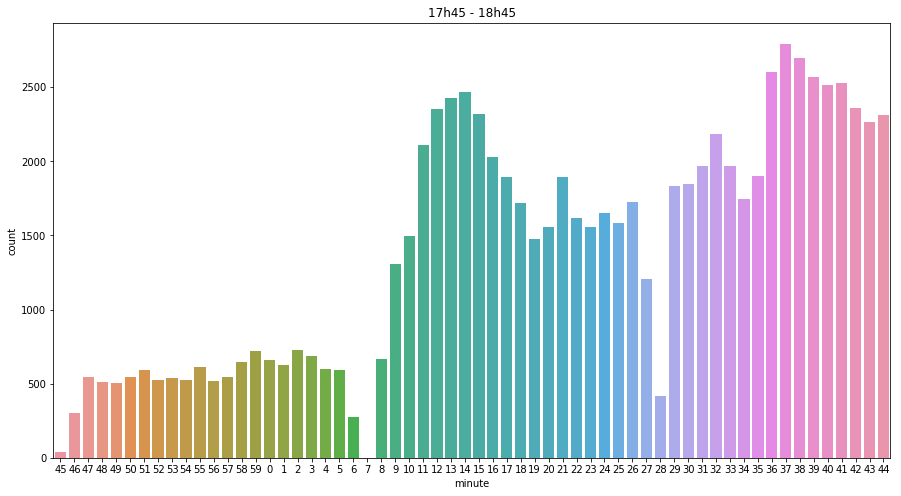

In [6]:
first_hour = tweets[(tweets['datetime']>pd.Timestamp('2018-09-26 17:45:00')) & (tweets['datetime']<=pd.Timestamp('2018-09-26 18:45:00'))]

fig, ax = plt.subplots(figsize=(15, 8))
x_order = list(range(45, 60)) + list(range(0, 45))
ax = sns.countplot(x='minute', data=first_hour, order=x_order)
_ = ax.set(title='17h45 - 18h45')

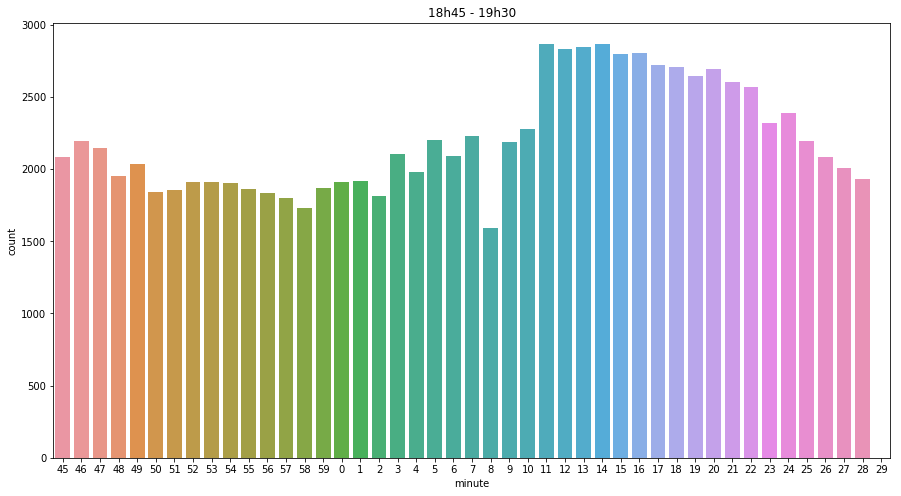

In [7]:
second_hour = tweets[(tweets['datetime']>pd.Timestamp('2018-09-26 18:45:00')) & (tweets['datetime']<=pd.Timestamp('2018-09-26 19:45:00'))]

fig, ax = plt.subplots(figsize=(15, 8))
x_order = list(range(45, 60)) + list(range(0, 30))
ax = sns.countplot(x='minute', data=second_hour, order=x_order)
_ = ax.set(title='18h45 - 19h30')

Aproximadamente 3 picos registrados: 18h11 - 18h16, 18h36 - 18h41, 19h11 - 19h22

In [8]:
data_1 = tweets[(tweets['datetime']>pd.Timestamp('2018-09-26 18:11:00')) & (tweets['datetime']<=pd.Timestamp('2018-09-26 18:14:00'))]

In [9]:
len(data_1)

6888

In [10]:
nlp = spacy.load('pt')

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [11]:
nlp.max_length = 3_000_000

In [12]:
len(tweets['text'])

180490

In [13]:
pico_1 = nlp(str(data_1['text']))

In [14]:
candidatos = ['ciro', 'bolsonaro', 'marina', 'alckmin', 'meireles', 'daciolo', 'álvaro', 'lula', 'haddad', 'amoedo', 'boulos']

In [15]:
len(candidatos)

11

In [16]:
def localizar_palavra(agulha, palheiro): 
    return pd.Series(np.histogram(
        [word.i for word in palheiro 
         if word.text.lower() == agulha], bins=50)[0])

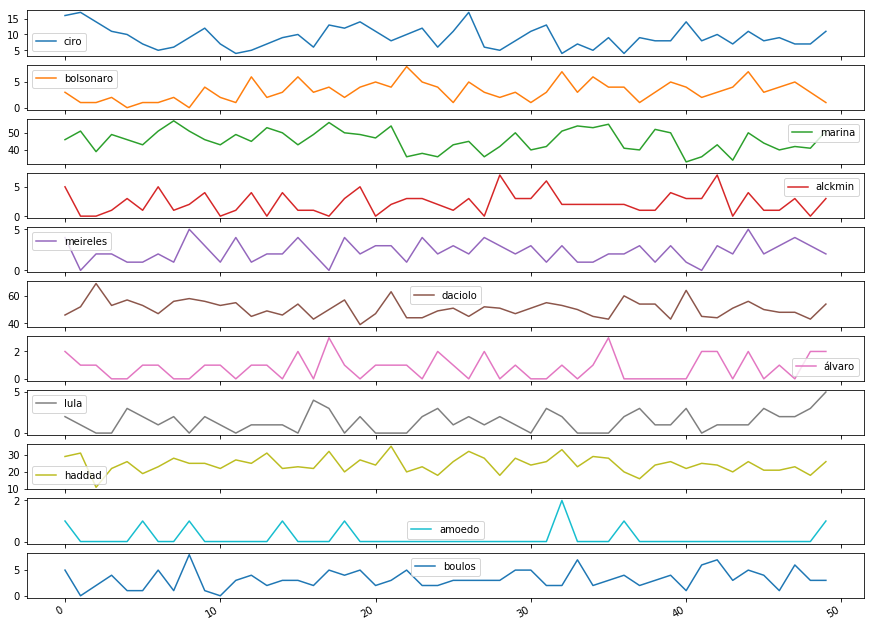

In [17]:
dispersao = pd.DataFrame({name: localizar_palavra(name.lower(), pico_1) for name in candidatos})

_ = dispersao.plot(subplots=True, figsize=(15,12))

Marina e Haddad, Alckmin e Meireles

Verbos que descrevem cada candidato:

In [18]:
from collections import Counter

def verbs_candidates(text, candidate):
    sents = [sent for sent in text.sents if candidate in sent.string.lower()]
    char_words = []
    for sent in sents: 
        for word in sent: 
            if candidate in word.string: 
                char_words.append(word)
    char_verbs = []
    for word in char_words: 
        for ancestor in word.ancestors: 
            if ancestor.pos_.startswith('V'): 
                char_verbs.append(ancestor.lemma_.strip())
    return Counter(char_verbs).most_common(20)

In [19]:
verbs_candidates(pico_1, 'haddad')

[('comer', 11),
 ('dar', 11),
 ('votar', 6),
 ('esmurrar', 5),
 ('ficar', 5),
 ('ter', 5),
 ('acabar', 4),
 ('pisar', 4),
 ('marino', 3),
 ('bater', 3),
 ('atacar', 3),
 ('eita', 3),
 ('chupar', 2),
 ('jogar', 2),
 ('falar', 2),
 ('usar', 2),
 ('tomar', 2),
 ('assistir', 2),
 ('enrabar', 2),
 ('meter', 2)]

In [20]:
verbs_candidates(pico_1, 'marina')

[('ter', 18),
 ('dar', 17),
 ('comer', 7),
 ('apoiar', 6),
 ('querer', 6),
 ('tomar', 5),
 ('votar', 5),
 ('esmurrar', 5),
 ('eita', 5),
 ('falar', 5),
 ('fazer', 5),
 ('gostar', 5),
 ('pedir', 4),
 ('alguem', 4),
 ('parecer', 4),
 ('pisar', 4),
 ('mandar', 4),
 ('saber', 4),
 ('ver', 4),
 ('botar', 4)]

In [21]:
verbs_candidates(pico_1, 'meireles')

[('ter', 4),
 ('dar', 2),
 ('segurar', 2),
 ('enterrar', 1),
 ('😂', 1),
 ('fazer', 1),
 ('henrique', 1),
 ('botar', 1),
 ('rir', 1),
 ('mandar', 1),
 ('chocar', 1),
 ('tomar', 1),
 ('chegar', 1),
 ('comer', 1),
 ('pisar', 1),
 ('falir', 1)]

In [22]:
verbs_candidates(pico_1, 'alckmin')

[('parecer', 1),
 ('defender', 1),
 ('deixar', 1),
 ('dividir', 1),
 ('acostumar', 1),
 ('jair', 1),
 ('rebater', 1)]

In [3]:
train = pd.read_csv('tweets_train.csv')
holdout = pd.read_csv('tweets_holdout.csv')

In [4]:
train.head()

,text,hour,minute,second,day,month,year,datetime,text_clean,sentiment
0,"""foda-se a eleição, eu quero ver o jogo porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"" - Álvaro Dias",19,24,23,26,9,2018,2018-09-26 19:24:23,foder o eleição querer o jogar porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa álvaro,0.0
1,MANO O DACIOLO É FODA GLÓRIA DEUS,19,12,45,26,9,2018,2018-09-26 19:12:45,manir o daciolo foder glória deus,1.0
2,"Porra Daciolo eu tinha até me emocionado com a declaração pra mamãe e esposa, agora tu mete essa de voto impresso meu consagrado? #DebateSBT",19,13,41,26,9,2018,2018-09-26 19:13:41,porra daciolo emocionar o declaração pra mamãe e esposo meter votar impresso consagrar debatesbt,-1.0
3,"Daciolo falou pouco, mas falou bonito...",18,37,45,26,9,2018,2018-09-26 18:37:45,daciolo falar falar bonito,1.0
4,"@morgalashnikova Eu n valorizei a grandeza desse candidato antes, mas agora eu percebi meu engano. 51 é só coisa boa, pinga e Daciolo",19,12,20,26,9,2018,2018-09-26 19:12:20,@morgalashnikova n valorizar o grandeza d candidatar antar perceber enganir 51 só pingar e daciolo,1.0


In [5]:
holdout.head()

,text,hour,minute,second,day,month,year,datetime,text_clean
0,A Questão é o Trabalho 9 debate a Contribuição Sindical com o desembargador Luiz Eduardo Gunther: https://t.co/DbIrDjVAJq via,19,19,23,26,9,2018,2018-09-26 19:19:23,o o 9 debater o contribuição sindical o desembargador luiz eduardo gunther
1,"São Paulo Futebol Clube ou, segundo o Alckmin, O Time Lá. #DebateSBT",18,47,47,26,9,2018,2018-09-26 18:47:47,paulo futebol clube segundar o alckmin o time debatesbt
2,Marina destruindo o RADADI,18,10,44,26,9,2018,2018-09-26 18:10:44,marino destruir o radadi
3,Boulos eu te amo!❤,19,6,55,26,9,2018,2018-09-26 19:06:55,boulos amar ❤
4,"O assustador desse último embate entre Haddad e Marina acerca do nome do Temer é que os dois tão certos: Marina apoiou o impeachment e ajudou a colocar o Temer ali, mas Temer e as alianças com o PMDB foram parte da política padrão do PT (e ainda hoje, localmente, vide Eunício).",18,14,17,26,9,2018,2018-09-26 18:14:17,o assustador d embater entrar haddad e marino acercar temer o certo marino apoiar o impeachment e ajudar o colocar o temer temer e o aliançar o pmdb político padrão pt e localmente vidar eunício


In [6]:
train.isnull().sum()

text          0
hour          0
minute        0
second        0
day           0
month         0
year          0
datetime      0
text_clean    0
sentiment     0
dtype: int64

In [7]:
holdout[holdout['text_clean'].isnull()]

,text,hour,minute,second,day,month,year,datetime,text_clean
653,Eu todinha,18,10,6,26,9,2018,2018-09-26 18:10:06,NaN
1559,Muito,18,27,41,26,9,2018,2018-09-26 18:27:41,NaN
1736,que assim seja.,18,38,5,26,9,2018,2018-09-26 18:38:05,NaN
2624,Isso numa quarta,19,17,14,26,9,2018,2018-09-26 19:17:14,NaN
3069,É verdade,19,24,58,26,9,2018,2018-09-26 19:24:58,NaN
3202,é isto,18,39,36,26,9,2018,2018-09-26 18:39:36,NaN
4480,Então.,18,13,39,26,9,2018,2018-09-26 18:13:39,NaN
5614,EU MESMA,17,54,28,26,9,2018,2018-09-26 17:54:28,NaN
7122,EU TODA,19,2,14,26,9,2018,2018-09-26 19:02:14,NaN
7659,Eu agora,18,11,12,26,9,2018,2018-09-26 18:11:12,NaN


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
n_train = train.shape[0]
full = pd.concat([train, holdout], ignore_index=True, sort=False)
full = full['text_clean'].copy().dropna()

In [10]:
full.shape

(180304,)

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(full)

In [12]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(X)

In [13]:
train_tfidf = X[:n_train, :]
holdout_tfidf = X[n_train:, :]
y = train['sentiment']
holdout = holdout.dropna()

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
from sklearn.ensemble import RandomForestClassifier

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
rf = RandomForestClassifier(n_jobs=-1).fit(train_tfidf, y)

In [17]:
cross_val_score(rf, train_tfidf, y, cv=10, scoring='accuracy').mean()

0.5669215921592159

In [18]:
preds = rf.predict(holdout_tfidf)

In [19]:
holdout['sentiment'] = preds

In [20]:
holdout.head()

,text,hour,minute,second,day,month,year,datetime,text_clean,sentiment
0,A Questão é o Trabalho 9 debate a Contribuição Sindical com o desembargador Luiz Eduardo Gunther: https://t.co/DbIrDjVAJq via,19,19,23,26,9,2018,2018-09-26 19:19:23,o o 9 debater o contribuição sindical o desembargador luiz eduardo gunther,0.0
1,"São Paulo Futebol Clube ou, segundo o Alckmin, O Time Lá. #DebateSBT",18,47,47,26,9,2018,2018-09-26 18:47:47,paulo futebol clube segundar o alckmin o time debatesbt,1.0
2,Marina destruindo o RADADI,18,10,44,26,9,2018,2018-09-26 18:10:44,marino destruir o radadi,1.0
3,Boulos eu te amo!❤,19,6,55,26,9,2018,2018-09-26 19:06:55,boulos amar ❤,1.0
4,"O assustador desse último embate entre Haddad e Marina acerca do nome do Temer é que os dois tão certos: Marina apoiou o impeachment e ajudou a colocar o Temer ali, mas Temer e as alianças com o PMDB foram parte da política padrão do PT (e ainda hoje, localmente, vide Eunício).",18,14,17,26,9,2018,2018-09-26 18:14:17,o assustador d embater entrar haddad e marino acercar temer o certo marino apoiar o impeachment e ajudar o colocar o temer temer e o aliançar o pmdb político padrão pt e localmente vidar eunício,-1.0


In [21]:
full_tweets = pd.concat([train, holdout], ignore_index=True)

In [22]:
full_tweets.head()

,text,hour,minute,second,day,month,year,datetime,text_clean,sentiment
0,"""foda-se a eleição, eu quero ver o jogo porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"" - Álvaro Dias",19,24,23,26,9,2018,2018-09-26 19:24:23,foder o eleição querer o jogar porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa álvaro,0.0
1,MANO O DACIOLO É FODA GLÓRIA DEUS,19,12,45,26,9,2018,2018-09-26 19:12:45,manir o daciolo foder glória deus,1.0
2,"Porra Daciolo eu tinha até me emocionado com a declaração pra mamãe e esposa, agora tu mete essa de voto impresso meu consagrado? #DebateSBT",19,13,41,26,9,2018,2018-09-26 19:13:41,porra daciolo emocionar o declaração pra mamãe e esposo meter votar impresso consagrar debatesbt,-1.0
3,"Daciolo falou pouco, mas falou bonito...",18,37,45,26,9,2018,2018-09-26 18:37:45,daciolo falar falar bonito,1.0
4,"@morgalashnikova Eu n valorizei a grandeza desse candidato antes, mas agora eu percebi meu engano. 51 é só coisa boa, pinga e Daciolo",19,12,20,26,9,2018,2018-09-26 19:12:20,@morgalashnikova n valorizar o grandeza d candidatar antar perceber enganir 51 só pingar e daciolo,1.0


In [31]:
nomes_candidatos = ['marina', 'haddad', 'boulos', 'meireles', 'daciolo', 'bolsonaro', 'alckmin', 'amoedo', 'álvaro']

for candidato in nomes_candidatos:
    candidato_sentiments = []
    
    for idx, row in enumerate(full_tweets['text']):
        if candidato in row.lower():
            candidato_sentiments.append(full_tweets.loc[idx, 'sentiment'])
        else:
            candidato_sentiments.append(-5)
            
    full_tweets[candidato] = candidato_sentiments


In [32]:
full_tweets.head()

,text,hour,minute,second,day,month,year,datetime,text_clean,sentiment,marina,haddad,boulos,meireles,daciolo,bolsonaro,alckmin,amoedo,álvaro
0,"""foda-se a eleição, eu quero ver o jogo porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"" - Álvaro Dias",19,24,23,26,9,2018,2018-09-26 19:24:23,foder o eleição querer o jogar porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa álvaro,0.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0.0
1,MANO O DACIOLO É FODA GLÓRIA DEUS,19,12,45,26,9,2018,2018-09-26 19:12:45,manir o daciolo foder glória deus,1.0,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0
2,"Porra Daciolo eu tinha até me emocionado com a declaração pra mamãe e esposa, agora tu mete essa de voto impresso meu consagrado? #DebateSBT",19,13,41,26,9,2018,2018-09-26 19:13:41,porra daciolo emocionar o declaração pra mamãe e esposo meter votar impresso consagrar debatesbt,-1.0,-5.0,-5.0,-5.0,-5.0,-1.0,-5.0,-5.0,-5.0,-5.0
3,"Daciolo falou pouco, mas falou bonito...",18,37,45,26,9,2018,2018-09-26 18:37:45,daciolo falar falar bonito,1.0,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0
4,"@morgalashnikova Eu n valorizei a grandeza desse candidato antes, mas agora eu percebi meu engano. 51 é só coisa boa, pinga e Daciolo",19,12,20,26,9,2018,2018-09-26 19:12:20,@morgalashnikova n valorizar o grandeza d candidatar antar perceber enganir 51 só pingar e daciolo,1.0,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0


In [33]:
full_tweets.iloc[:, 10:].head()

,marina,haddad,boulos,meireles,daciolo,bolsonaro,alckmin,amoedo,álvaro
0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0.0
1,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0
2,-5.0,-5.0,-5.0,-5.0,-1.0,-5.0,-5.0,-5.0,-5.0
3,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0
4,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0


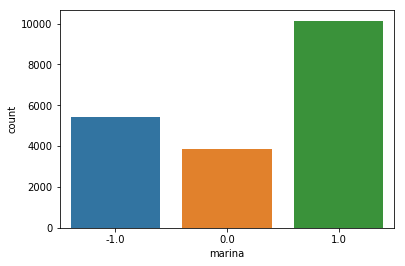

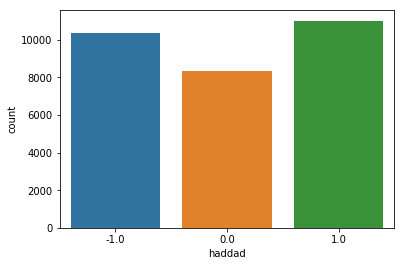

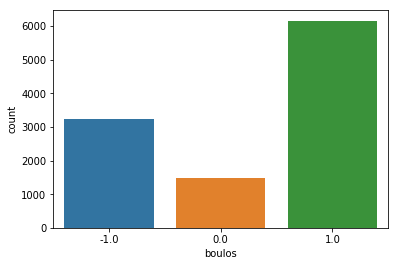

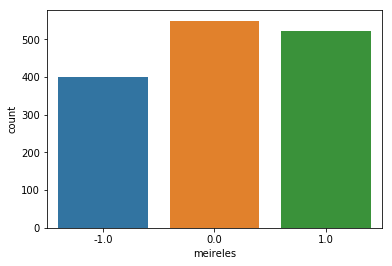

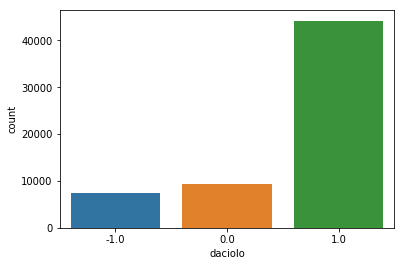

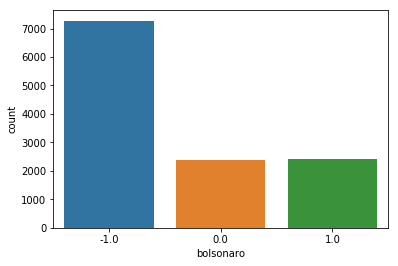

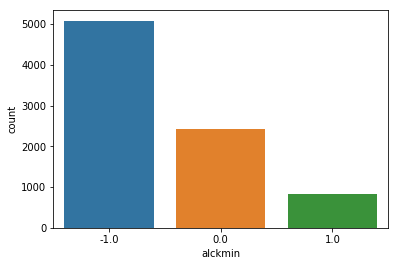

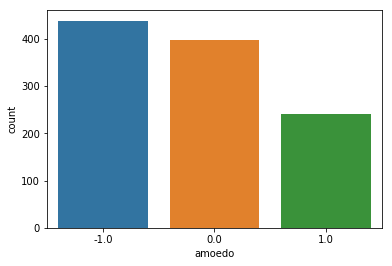

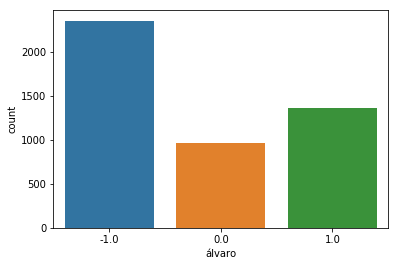

In [38]:
for candidato in nomes_candidatos:
    fig, ax = plt.subplots()
    data = full_tweets[full_tweets[candidato]!=-5][candidato]
    ax = sns.countplot(x=data)
    plt.show()

In [67]:
qtde_tweets = {}
for candidato in nomes_candidatos:
    positivos = len(full_tweets[full_tweets[candidato]==1][candidato])
    neutros = len(full_tweets[full_tweets[candidato]==0][candidato])
    negativos = len(full_tweets[full_tweets[candidato]==-1][candidato])
    
    qtde_tweets[candidato] = [positivos, neutros, negativos]

In [91]:
qtde_tweets_df = pd.DataFrame(qtde_tweets, index=['positivos', 'neutros', 'negativos']).T

qtde_tweets_df['total'] = qtde_tweets_df.sum(axis=1)
qtde_tweets_df = qtde_tweets_df.sort_values(by='total', ascending=False)
qtde_tweets_df

,positivos,neutros,negativos,total
daciolo,44188,9413,7447,61048
haddad,11017,8339,10363,29719
marina,10141,3852,5430,19423
bolsonaro,2401,2386,7274,12061
boulos,6157,1471,3221,10849
alckmin,833,2433,5083,8349
álvaro,1363,961,2353,4677
meireles,522,549,399,1470
amoedo,240,398,438,1076


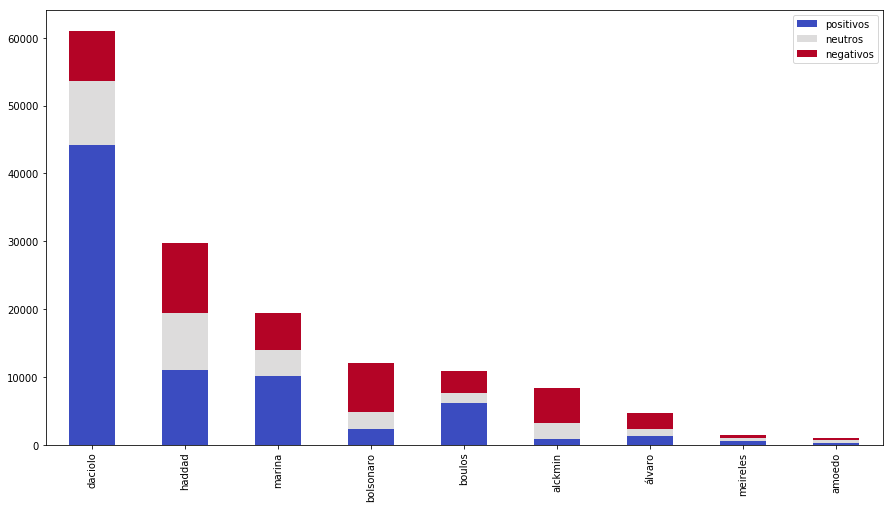

In [92]:
qtde_tweets_df.drop('total', axis=1).plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15,8));